In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
print(y_test[4])

[6]


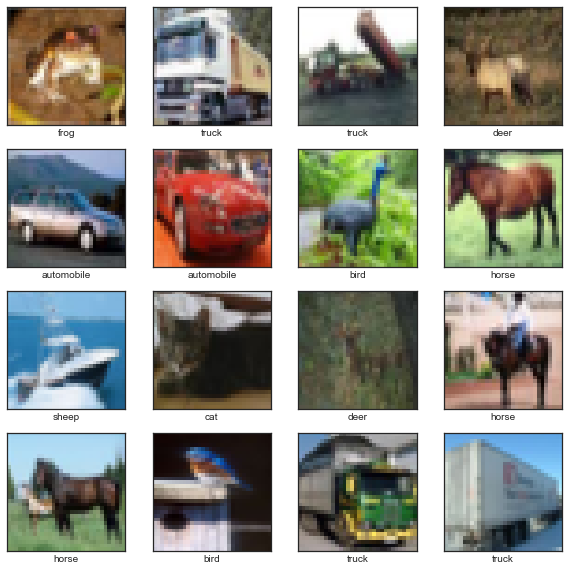

In [4]:
np.random.seed(1234)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 16
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [5]:
x_mean = np.mean(x_train_full, axis=(0, 1, 2))
x_std = np.std(x_train_full, axis=(0, 1, 2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

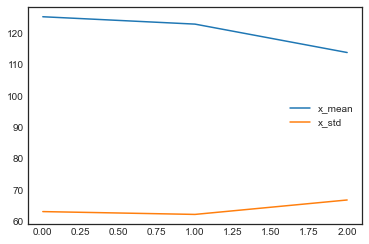

In [6]:
plt.plot(x_mean, label='x_mean')
plt.plot(x_std,label='x_std')
plt.legend()

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3)

In [8]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
def model_build():
    model = Sequential()

    input = Input(shape=(32, 32, 3))

    output = Conv2D(filters=16, kernel_size=4, padding='valid', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(output)

    output = Conv2D(filters=32, kernel_size=4, padding='valid', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(output)

    output = Conv2D(filters=64, kernel_size=4, padding='valid', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=1, padding='valid')(output)

    output = Flatten()(output)
    output = Dense(64, activation='relu')(output)
    output = Dense(16, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer=Adam(learning_rate=1e-2),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
    return model

In [10]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0     

In [13]:
history=model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
1094/1094 [==============================] - 140s 128ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3040 - val_accuracy: 0.1012
Epoch 2/10
1094/1094 [==============================] - 141s 129ms/step - loss: 2.3038 - accuracy: 0.1009 - val_loss: 2.3034 - val_accuracy: 0.1020
Epoch 3/10
1094/1094 [==============================] - 145s 133ms/step - loss: 2.3040 - accuracy: 0.0971 - val_loss: 2.3046 - val_accuracy: 0.1005
Epoch 4/10
1094/1094 [==============================] - 140s 128ms/step - loss: 2.3039 - accuracy: 0.0977 - val_loss: 2.3045 - val_accuracy: 0.0958
Epoch 5/10
1094/1094 [==============================] - 142s 130ms/step - loss: 2.3038 - accuracy: 0.1041 - val_loss: 2.3038 - val_accuracy: 0.1012
Epoch 6/10
1094/1094 [==============================] - 143s 131ms/step - loss: 2.3039 - accuracy: 0.0995 - val_loss: 2.3048 - val_accuracy: 0.1005
Epoch 7/10
1094/1094 [==============================] - 145s 132ms/step - loss: 2.3040 - accuracy: 0.1001 - val_